# Praca Domowa 2 - Wstęp do uczenia maszynowego
# Poprawiona wersja
## Kinga Ułasik IiAD 03.04.2021

### Zaimportowanie potrzebnych pakietów

In [5]:
import pandas as pd
import pylab as pl
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as ticker
import random
import category_encoders as ce
from sklearn.impute import KNNImputer

from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import category_encoders as ce
from sklearn.metrics import mean_squared_error

## Wczytanie danych

In [7]:
allegro = pd.read_csv('allegro-api-transactions.csv')
allegro.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [17]:
allegro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

# Zadanie 1

## Encoding
### Target Encoding

In [15]:
X= allegro.drop('price', axis =1)
y= allegro.drop('it_location', axis=1)
#aby nie powatarzać tych samych nazw tylko dlatego, że niektóre są z wielkiej litery użyjemy 'str.lower'
X['it_location'] = X['it_location'].str.lower()

encoder = ce.TargetEncoder(cols=['it_location'])
encoder.fit(X,y['price'])
allegro_target_coded=encoder.transform(X,y['price'])
allegro_target_coded.head(3)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,84.132898,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,84.132898,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,64.883187,Dom i Ogród


Dla porównania zobaczmy jak wyglądałby One Hot Encoding na it_location:`

In [26]:
copy = allegro.copy(deep=True)
copy['it_location'] = copy['it_location'].str.lower()

allegro_ohe_coded = pd.get_dummies(copy.it_location)
allegro_ohe_coded.head(3)

,"\twarszawa,wrocław,częstochowa",*,dzierżoniów,warszawa janki,- ząbki koło warszawy,18 miast i wysyłkowo cała polska,@,_,cały kraj,chotomów,...,żyrzyn,żytniów,żytno,żywiec,żywiec ul. browarna 75,żywiec- bielsko-katowice-gliwice,żórawina,żółkiewka,żędowice,↑╔╩═╬╤╤╝←
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Target Encoding a One-Hot Encoding

#### Plusy Target encodingu
* niewątpliwą przewagą jest to że nie dodajemy kolumn do tabeli (w One-Hot Encoding może ich się pojawić bardzo dużo, jak w powyżej)
* niesie dodatkowe informacje o targecie i kategoriach

#### Plusy One-Hot Encodingu
* eliminuje problem kiedy w kolumnie mamy duże wartości kategoryczne, ponieważ po encodingu a kolumna jest w postaci binarnej - 1 lub 0
* wymaga weryfikacji ponieważ może powodować  overfitting



## Inne Rodzaje Encoding-u
### One Hot Encoding


In [21]:
allegro_ohe_main = pd.get_dummies(allegro.main_category, sparse=True)
allegro_ohe_main = pd.concat([allegro, allegro_ohe_main], axis=1)
allegro_ohe_main.head(3)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,Nieruchomości,"Odzież, Obuwie, Dodatki",Przemysł,RTV i AGD,Rękodzieło,Sport i Turystyka,"Sprzęt estradowy, studyjny i DJ-ski",Telefony i Akcesoria,Uroda,Zdrowie
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,1,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0


## Count Encoder
Count encoder zastępuje wartość w kolumnie ilością wystapień tej wartości w całej tabeli. To działa i jest przydatne, bo rzadko występujące wartości będą miały podobne kody, a wartości występujące bardzo często raczej nie będą miały takiej samej liczności. Dodatkowo niesie ze sobą dodatkową informację o częstotliwości występowania danych kategorii. 

In [9]:
encoder = ce.count.CountEncoder(cols=['main_category'], return_df=True)
encoder.fit(allegro, allegro['price'])
allegro_ce_main = encoder.transform(allegro)

allegro_ce_main.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,14491
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,54257
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,91042
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,11572
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,54257


## Binary Encoder

Binary encoder najpierw przekształca warotść na liczbową tak jak w Ordinal Encoder, następnie liczby są przekształcane na liczbę w systemie binarną, następnie wartość binarna jest dzielona na różne kolumny. Ten sposób działa dobrze w przypadku dużej liczby kategorii.

In [46]:
encoder = ce.binary.BinaryEncoder(cols=['main_category'], return_df=True)
encoder.fit(allegro, allegro['price'])
allegro_be_main = encoder.transform(allegro)

allegro_be_main.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,0,0,0,0,0,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,0,0,0,0,1,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,0,0,0,0,1,1
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,0,0,0,1,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,0,0,0,0,1,0


# Zadanie 2
## Multivariate Imputation - Iterative Imputer

### Tylko jedna kategoria

In [28]:
#wylosowanie numerów wierszy, w których pojawią NaN-y
l = random.sample(range(0, len(allegro['main_category'])), round(len(allegro['main_category'])/10))
tmp = allegro.copy(deep=True)
tmp = tmp[['price', 'it_seller_rating','it_quantity']]
tmp.loc[l, 'it_seller_rating'] = np.NaN
tmp.head()

,price,it_seller_rating,it_quantity
0,59.99,NaN,997
1,4.90,12428.0,9288
2,109.90,7389.0,895
3,18.50,15006.0,971
4,19.90,NaN,950


In [29]:
allegro_data = allegro.values
data = tmp.values
ix = [i for i in range(data.shape[1]) if i != 0]
X, y = data[:, ix], data[:, 0]
imputer = IterativeImputer()
imputer.fit(X)
Xtrans = imputer.transform(X) 

In [30]:
#dla sprawdzenia czy wszystko wykonało się poprawnie
print('Missing: %d' % sum(isnan(X).flatten()))
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 42002
Missing: 0


In [31]:
#policzmy błąd za pomocą RMSE
rmse = mean_squared_error(Xtrans[l,0], allegro_data[l,11] , squared=False)
print(rmse)

36106.50356228659


In [32]:
#zbadajmy średnią wartości w kolumnie 'it_seller_rating' żeby zbadać jak duży jest błąd
print(allegro['it_seller_rating'].mean())

20402.59349554783


### 10 iteracji dla jednej kategorii

In [33]:
errors = []
for i in range(10):
    l = random.sample(range(0, len(allegro['main_category'])), round(len(allegro['main_category'])/10))
    tmp = allegro.copy(deep=True)
    tmp = tmp[['price', 'it_seller_rating','it_quantity']]
    tmp.loc[l, 'it_seller_rating'] = np.NaN
    data = tmp.values
    ix = [i for i in range(data.shape[1]) if i != 0]
    X, y = data[:, ix], data[:, 0]
    imputer = IterativeImputer()
    imputer.fit(X)
    Xtrans = imputer.transform(X) 
    rmse = mean_squared_error(Xtrans[l,0], allegro_data[l,11] , squared=False)
    errors.append(rmse)

In [34]:
std = np.std(errors, axis=0)
print(std)

289.6797147522258


### Wizualizacja wyniku

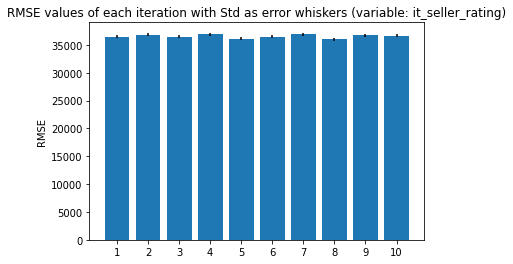

In [35]:
plot_data = {'Index' : [1,2,3,4,5,6,7,8,9,10], 'RMSE':errors, 'STD':[std]*10}
plot_df = pd.DataFrame(plot_data) 
#sns.barplot(data=plot_df, x = 'Index', y = 'RMSE', color='steelblue',ci='STD')
fig, ax = plt.subplots()
ax.bar(plot_df['Index'], plot_df['RMSE'], yerr=plot_df['STD'])
ax.set_xticks(plot_df['Index'])
ax.set_title('RMSE values of each iteration with Std as error whiskers (variable: it_seller_rating)')
ax.set_ylabel('RMSE')
plt.show()

### Dwie kategorie

In [36]:
l = random.sample(range(0, len(allegro['main_category'])), round(len(allegro['main_category'])/10))
p = random.sample(range(0, len(allegro['main_category'])), round(len(allegro['main_category'])/10))
tmp = allegro.copy(deep=True)
tmp = tmp[['price', 'it_seller_rating','it_quantity']]
tmp.loc[l, 'it_seller_rating'] = np.NaN
tmp.loc[p, 'it_quantity'] = np.NaN
data = tmp.values
ix = [i for i in range(data.shape[1]) if i != 0]
X, y = data[:, ix], data[:, 0]
imputer = IterativeImputer()
imputer.fit(X)
Xtrans = imputer.transform(X) 

In [37]:
#dla sprawdzenia czy wszystko wykonało się poprawnie
print('Missing: %d' % sum(isnan(X).flatten()))
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 84004
Missing: 0


In [38]:
#policzmy błąd za pomocą RMSE
rmse1 = mean_squared_error(Xtrans[l,0], allegro_data[l,11] , squared=False)
rmse2 = mean_squared_error(Xtrans[p,1], allegro_data[p,9] , squared=False)
print(rmse1)
print(rmse2)

36393.55788354312
23177.502858831253


In [39]:
#zbadajmy średnią wartości w kolumnie 'it_quantity' żeby zbadać jak duży jest błąd
print(allegro['it_quantity'].mean())

6748.274822627494


### 10 iteracji dla dwoch kategorii

In [40]:
errors1 = []
errors2 = []
for i in range(10):
    l = random.sample(range(0, len(allegro['main_category'])), round(len(allegro['main_category'])/10))
    p = random.sample(range(0, len(allegro['main_category'])), round(len(allegro['main_category'])/10))
    tmp = allegro.copy(deep=True)
    tmp = tmp[['price', 'it_seller_rating','it_quantity']]
    tmp.loc[l, 'it_seller_rating'] = np.NaN
    tmp.loc[p, 'it_quantity'] = np.NaN
    data = tmp.values
    ix = [i for i in range(data.shape[1]) if i != 0]
    X, y = data[:, ix], data[:, 0]
    imputer = IterativeImputer()
    imputer.fit(X)
    Xtrans = imputer.transform(X)
    rmse1 = mean_squared_error(Xtrans[l,0], allegro_data[l,11] , squared=False)
    errors1.append(rmse1)
    rmse2 = mean_squared_error(Xtrans[p,1], allegro_data[p,9] , squared=False)
    errors2.append(rmse2)
    

In [41]:
std1 = np.std(errors1, axis=0)
print(std1)

256.7455532043524


In [42]:
std2 = np.std(errors2, axis=0)
print(std2)

101.19670381341835


### Wizualizacja wyniku

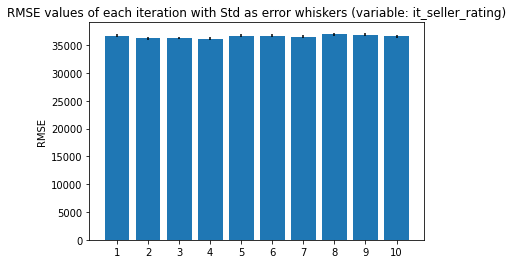

In [43]:
plot_data1 = {'Index' : [1,2,3,4,5,6,7,8,9,10], 'RMSE':errors1, 'STD':[std1]*10}
plot_df1 = pd.DataFrame(plot_data1) 
#sns.barplot(data=plot_df, x = 'Index', y = 'RMSE', color='steelblue',ci='STD')
fig, ax = plt.subplots()
ax.bar(plot_df1['Index'], plot_df1['RMSE'], yerr=plot_df1['STD'])
ax.set_xticks(plot_df1['Index'])
ax.set_title('RMSE values of each iteration with Std as error whiskers (variable: it_seller_rating)')
ax.set_ylabel('RMSE')
plt.show()

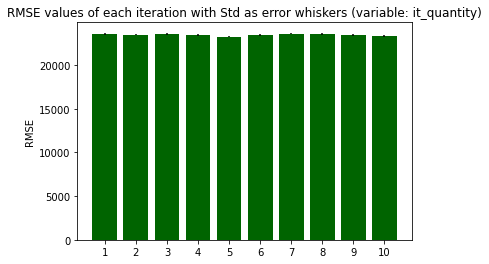

In [44]:
plot_data2 = {'Index' : [1,2,3,4,5,6,7,8,9,10], 'RMSE':errors2, 'STD':[std2]*10}
plot_df2 = pd.DataFrame(plot_data2) 
fig, ax = plt.subplots()
ax.bar(plot_df2['Index'], plot_df2['RMSE'], yerr=plot_df2['STD'], color='darkgreen')
ax.set_xticks(plot_df2['Index'])
ax.set_title('RMSE values of each iteration with Std as error whiskers (variable: it_quantity)')
ax.set_ylabel('RMSE')
plt.show()

### Wnioski
* przebadane narzędzi imputacji działa poprawnie, jednak błąd wygenerowanych danych z prawdziwymi jest jednak spory (dla zmiennej 'it_seller_rating' RMSE jest ponad 150% średniej wartości tej kolumny, a zmiennej 'it_quantity' RMSE jest średnio ponad 400% średniej wartości zmiennej)
* przy kilku podejściach uzupełniania brakujących danych, wartości błedu (RMSE) nie różniły się znacznie (niska wartość standardowego odchylenia)
* im więcej braków w tabeli tym, w większości przypadków, mniejsza dokładność imputacji i większe odchylenie standardowe błędu (wykres potwierdzający poniżej)

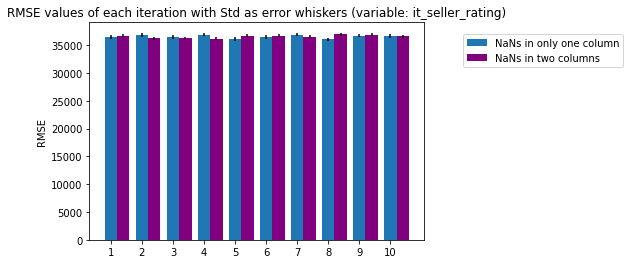

In [45]:
width=0.4
fig, ax = plt.subplots()
ax.bar(plot_df1['Index'], plot_df['RMSE'], width, yerr=plot_df['STD'], label = 'NaNs in only one column')
ax.bar(plot_df1['Index'] + width, plot_df1['RMSE'], width, yerr=plot_df1['STD'], label='NaNs in two columns', color ='purple')
ax.set_xticks(plot_df1['Index'])
ax.set_title('RMSE values of each iteration with Std as error whiskers (variable: it_seller_rating)')
ax.set_ylabel('RMSE')
ax.legend(bbox_to_anchor=(1.1, 0.97))
plt.show()